In [3]:
#importação de bibliotecas
import pandas as pd

import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")

#visualização de dados
from matplotlib import pyplot as plt

#aprendizagem de maquinas
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importação de dados /preparação de dados
data = pd.read_csv('C:/csv/tamanho_pinguins.csv')
data.head()

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
#Data Tidy
#ir até o final da tabela pra observar se ainda aparece dados faltantes
data.tail()

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [6]:
#visualizando dados
data.head()

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
#calculando o percentual de valores faltantes de cada coluna
temp = data.isna().sum()/(len(data))*100
temp

especie         0.000000
ilha            0.000000
comp_bico_mm    0.581395
larg_bico_mm    0.581395
comp_asa_mm     0.581395
peso_gr         0.581395
sexo            2.906977
dtype: float64

In [8]:
#definindo formas de lidar
#Preenchendo o sexo com a MODA da base
# Moda
print(data['sexo'].mode())
data['sexo'].fillna(data['sexo'].mode()[0])

0    MALE
Name: sexo, dtype: object


0        MALE
1      FEMALE
2      FEMALE
3        MALE
4      FEMALE
        ...  
339      MALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sexo, Length: 344, dtype: object

In [9]:
# Media


#checando valor medio de comprimento da asa
print(data['comp_asa_mm'].mean())

#preenchendo a asa com o valor medio
data['comp_asa_mm'].fillna(data['comp_asa_mm'].mean()[0])

200.91520467836258


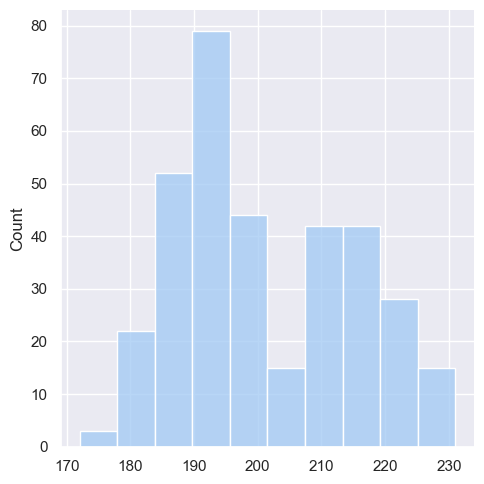

In [10]:
#distribuição dos valores do comprimento da asa
sns.displot(data.comp_asa_mm.values);

In [11]:
# nesse caso iremos apenas apagar as linhas que possuem valores faltantes
data = data.dropna()

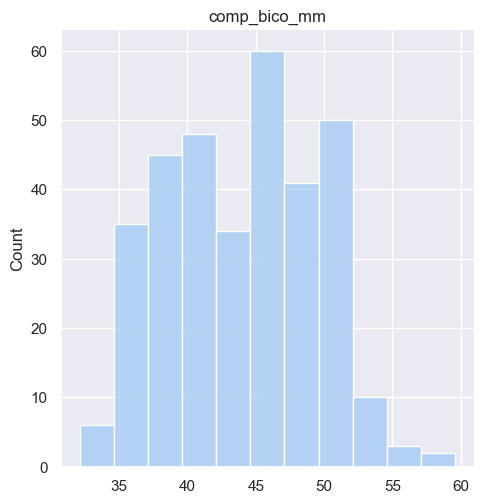

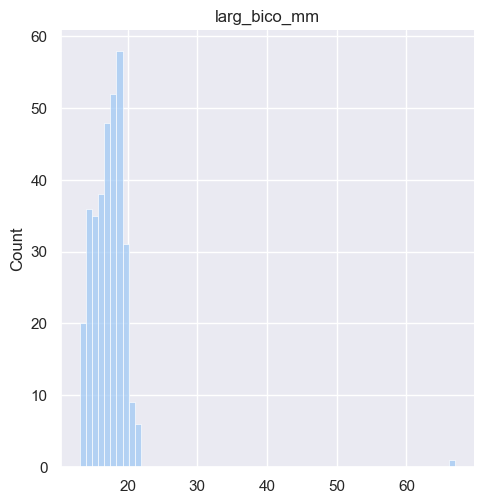

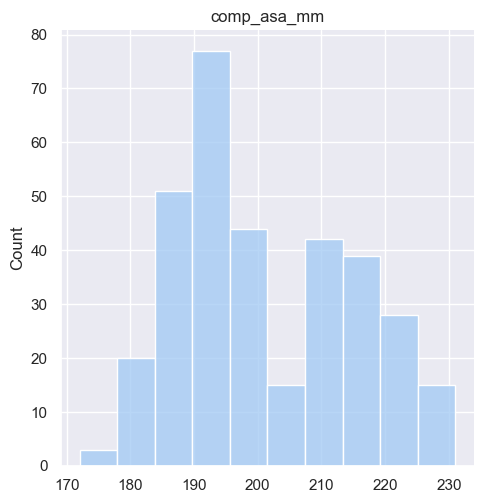

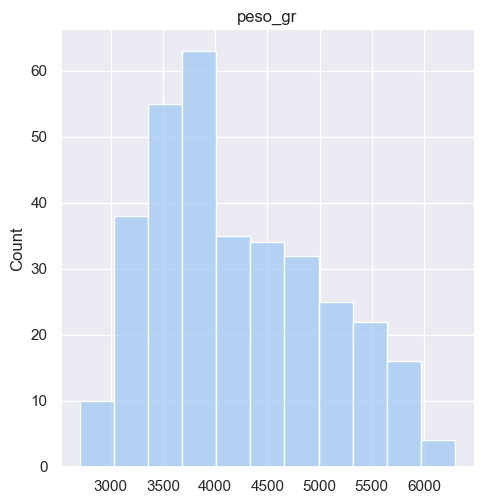

In [12]:
#lidando com outliers

#apresentando a distribuição de valores, comprimento bico, largura bico, comprimento asa e peso
cols = ['comp_bico_mm', 'larg_bico_mm', 'comp_asa_mm', 'peso_gr']
for c in cols:
    sns.displot(data[c].values)\
        .set(title=c)

In [13]:
#outlier nos valores de bico
data[data.larg_bico_mm > 50]

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
37,Adelie,Dream,42.2,67.0,180.0,3550.0,FEMALE


In [14]:
#removendo o valor outlier do bico definindo que valores de bicos só podem ser menores que 50
data = data[data.larg_bico_mm < 50]

In [15]:
#normalizando
#os valores precisam sempre ser numericos

#função de preprocessamento
#define o valor maximo e minimo( 0) e o maximo se torna 1
from sklearn.preprocessing import MinMaxScaler

X, y = data.dropna().iloc[:, 2:-1], data.dropna().iloc[:, 0]

X

,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [16]:
#demonstrando que o valor maximo é 1
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_.max()

1.0

In [17]:
X_

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [18]:
#Algoritmo de Agrupamento
from sklearn.cluster import KMeans

In [19]:
#pegando só duas colunas da tabela dos pinguis (comprimento das asas e bicos)
x = X_[:, [0,2]]

#Rodando K-means com numero de cluster(3), random state= 3 pra ser igual para os 3, fitando no final o subset com as 2 colunas 
kmeans = KMeans(n_clusters=3, random_state=3, n_init="auto").fit(x)
labels = kmeans.labels_

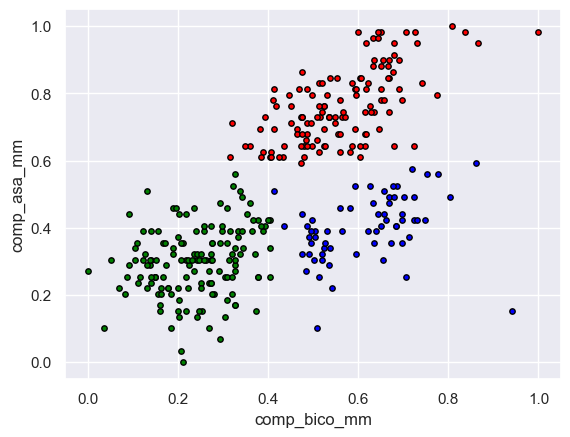

In [20]:
#Divisão de grupos de dados 


plt.scatter(x[labels == 0, 0], x[labels == 0, 1], color="blue", edgecolors='black', s=15)
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], color="red", edgecolors='black', s=15)
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], color="green", edgecolors='black', s=15)
plt.xlabel('comp_bico_mm')
plt.ylabel('comp_asa_mm');

In [21]:
#Algoritmo de Densidade
#vai ser definido um raio em torno de um ponto pra definir se ele tem pontos ao redor, se não tiver é uma fronteira ou outlier
from sklearn.cluster import DBSCAN

In [22]:
#Raio de 0,07 considerando 10 pontos na região em volta
db = DBSCAN(eps=0.07, min_samples=10).fit(x)
labels = db.labels_

# Numero de clusters na labels, ignorando o ruido se estiver presente
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

#resultado: 2 grupos com 26 ruidos

Estimated number of clusters: 2
Estimated number of noise points: 26


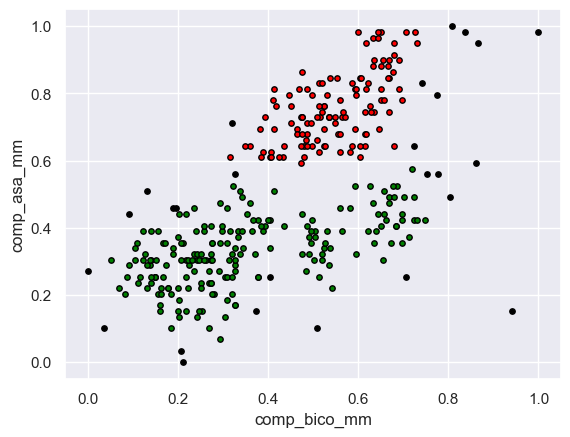

In [23]:
#grupo a partir do Dbscan
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], color="green", edgecolors='black', s=15)
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], color="red", edgecolors='black', s=15)
plt.scatter(x[labels == -1, 0], x[labels == -1, 1], color="black", edgecolors='black', s=15)
plt.xlabel('comp_bico_mm')
plt.ylabel('comp_asa_mm');

In [24]:
#Agrupamento hierarquico
#Começa com uma base com todos os pontos separados, a hierarquia vai surgindo de um ponto conectando ao mais proximo
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_)

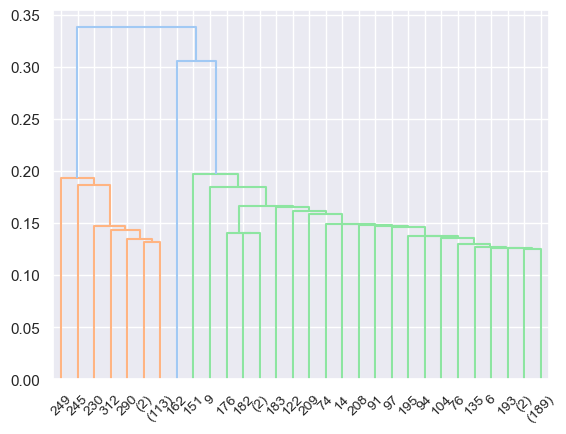

In [25]:
#Como fica a divisão hierarquica
#surge 3 grupos
dendrogram(Z, truncate_mode='lastp');  

In [26]:
#Avaliação de grupos
from sklearn import metrics

In [27]:
#metricas internas
#Quanto mais proximo de 1.0 melhor é o agrupamento
#Com K-means
#o quão proximo objetos no cluster estão proximos entre si?
metrics.silhouette_score(x,kmeans.labels_)

0.5202564405821186

In [28]:
#com Dbscan
metrics.silhouette_score(x,db.labels_)

0.42385445622120743

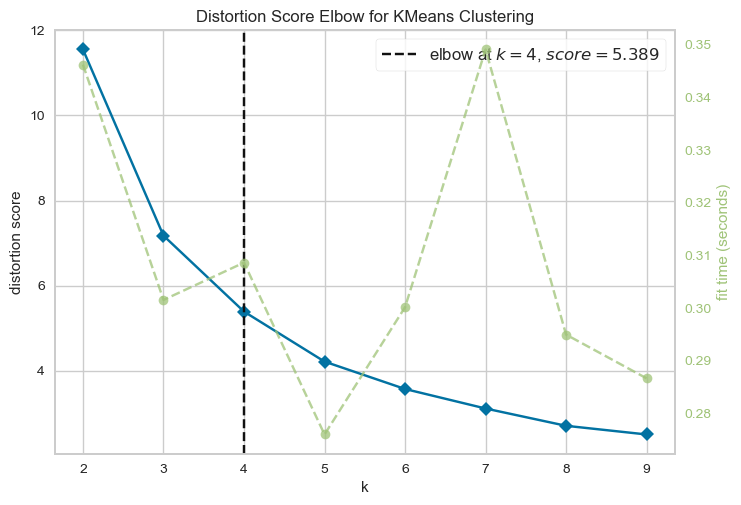

In [29]:
#metodo do cotovelo =  testar varios numeros de grupos até o achar o melhor
from yellowbrick.cluster import KElbowVisualizer
model = KMeans() #modelo k-means
visualizer = KElbowVisualizer(model, k=(2,10),metric='distortion', timings= True) #passando o modelo o teste vai ser com 2 a 10 cluster
visualizer.fit(x) #tetando o modelo
visualizer.show(); #visualizando
#o valor ideal por aqui é 4 grupos

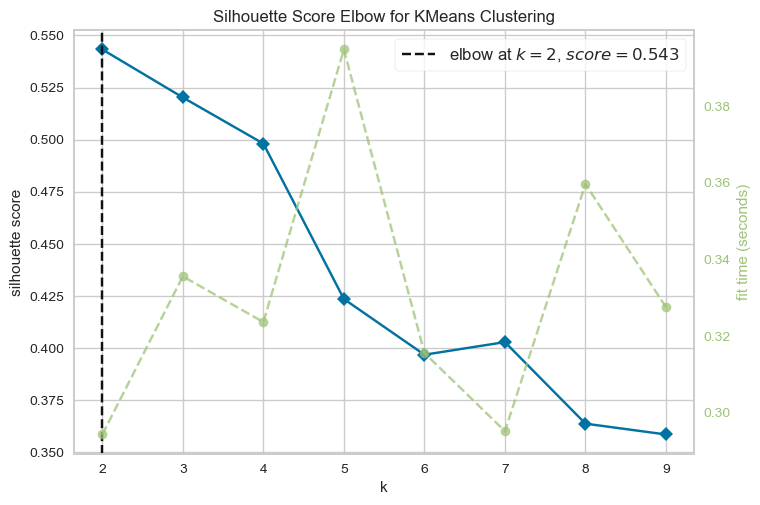

In [30]:
#vendo por uma medida relativa = silhouette
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(x) 
visualizer.show(); 
#valor ideal na shilhouete é 2 grupos

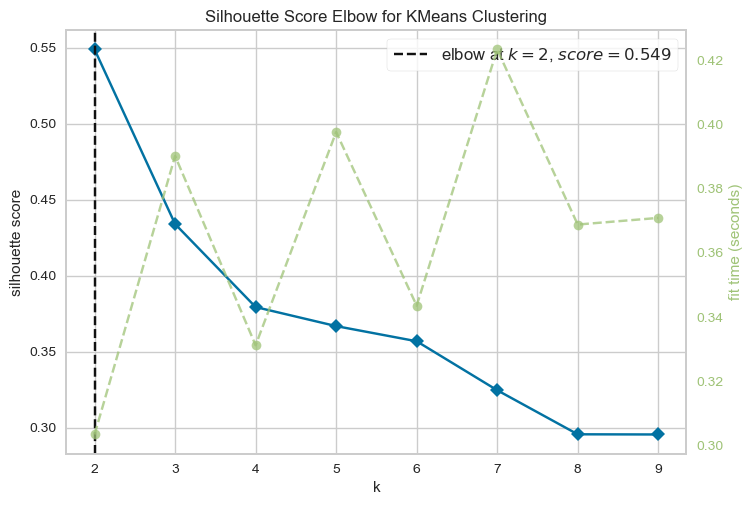

In [35]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(X_) #testando com 4 colunas = X_ definido anteriormente
visualizer.show(); 
#shilhouete continua melhor com 2 grupos

In [33]:
X_

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [34]:
x

array([[0.25454545, 0.15254237],
       [0.26909091, 0.23728814],
       [0.29818182, 0.38983051],
       [0.16727273, 0.3559322 ],
       [0.26181818, 0.30508475],
       [0.24727273, 0.15254237],
       [0.25818182, 0.38983051],
       [0.32727273, 0.16949153],
       [0.23636364, 0.3220339 ],
       [0.09090909, 0.44067797],
       [0.16363636, 0.22033898],
       [0.24      , 0.38983051],
       [0.37818182, 0.42372881],
       [0.08363636, 0.20338983],
       [0.50545455, 0.37288136],
       [0.20727273, 0.03389831],
       [0.20363636, 0.13559322],
       [0.13818182, 0.28813559],
       [0.22181818, 0.22033898],
       [0.24363636, 0.13559322],
       [0.11636364, 0.25423729],
       [0.30909091, 0.18644068],
       [0.30545455, 0.25423729],
       [0.21090909, 0.        ],
       [0.30545455, 0.13559322],
       [0.26909091, 0.10169492],
       [0.18545455, 0.10169492],
       [0.26909091, 0.27118644],
       [0.32      , 0.20338983],
       [0.15636364, 0.38983051],
       [0.